# apple_music_analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("kanchana1990/apple-music-dataset-10000-tracks-uncovered")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'apple-music-dataset-10000-tracks-uncovered' dataset.
Path to dataset files: /kaggle/input/apple-music-dataset-10000-tracks-uncovered


In [ ]:
df = pd.read_csv('/kaggle/input/apple-music-dataset-10000-tracks-uncovered' + "/apple_music_10000.csv")
df.head()

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
0,46087,Erick Sermon,Music,298321651,Music,9.99,Explicit,USA,USD,1,...,Hip-Hop/Rap,2001-08-27T12:00:00Z,Music (feat. Marvin Gaye),16,explicit,298321904,Music,4,1.29,223133
1,20044,Madonna,Music,80815197,Music,9.99,NaN,USA,USD,1,...,Pop,2000-08-21T07:00:00Z,Music,10,notExplicit,80815173,Music,1,1.29,225973
2,486597,Journey,Greatest Hits (2024 Remaster),169003304,Greatest Hits (2024 Remaster),10.99,NaN,USA,USD,1,...,Rock,1981-06-03T07:00:00Z,Don't Stop Believin' (2024 Remaster),16,notExplicit,169003415,Don't Stop Believin' (2024 Remaster),2,1.29,250835
3,156987,Jason Mraz,We Sing. We Dance. We Steal Things,277635758,We Sing. We Dance. We Steal Things,11.99,NaN,USA,USD,1,...,Pop,2008-02-12T08:00:00Z,I'm Yours,12,notExplicit,277635828,I'm Yours,2,1.29,242947
4,46087,Erick Sermon,Music,298429528,Music,9.99,Clean,USA,USD,1,...,Hip-Hop/Rap,2001-05-29T07:00:00Z,Music (feat. Marvin Gaye),16,cleaned,298429596,Music,4,1.29,223133


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artistId                10000 non-null  int64  
 1   artistName              10000 non-null  object 
 2   collectionCensoredName  10000 non-null  object 
 3   collectionId            10000 non-null  int64  
 4   collectionName          10000 non-null  object 
 5   collectionPrice         9919 non-null   float64
 6   contentAdvisoryRating   1512 non-null   object 
 7   country                 10000 non-null  object 
 8   currency                10000 non-null  object 
 9   discCount               10000 non-null  int64  
 10  discNumber              10000 non-null  int64  
 11  isStreamable            9999 non-null   object 
 12  kind                    10000 non-null  object 
 13  previewUrl              10000 non-null  object 
 14  primaryGenreName        10000 non-null 

In [5]:
df.describe()

,artistId,collectionId,collectionPrice,discCount,discNumber,trackCount,trackId,trackNumber,trackPrice,trackTimeMillis
count,1.000000e+04,1.000000e+04,9919.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,9976.000000,10000.000000
mean,1.683742e+08,5.821244e+08,11.050584,1.093700,1.040300,14.669900,5.820939e+08,6.882500,1.195245,232916.236200
std,2.733645e+08,4.358096e+08,4.191951,0.445354,0.269969,6.886688,4.358452e+08,5.793017,0.416041,65156.039408
min,1.195500e+04,1.609670e+05,-1.000000,1.000000,1.000000,1.000000,1.609530e+05,1.000000,-1.000000,8192.000000
25%,4.687880e+05,2.586423e+08,9.990000,1.000000,1.000000,12.000000,2.586432e+08,2.000000,1.290000,197920.000000
50%,6.766228e+06,4.186741e+08,10.990000,1.000000,1.000000,14.000000,4.186741e+08,6.000000,1.290000,225526.500000
75%,2.756497e+08,9.095616e+08,12.990000,1.000000,1.000000,17.000000,9.095616e+08,10.000000,1.290000,258910.250000
max,1.668991e+09,1.727624e+09,149.990000,28.000000,14.000000,100.000000,1.727624e+09,88.000000,1.990000,943529.000000


In [6]:
df.isna().sum()

,0
artistId,0
artistName,0
collectionCensoredName,0
collectionId,0
collectionName,0
collectionPrice,81
contentAdvisoryRating,8488
country,0
currency,0
discCount,0


## Data Cleaning

In [7]:
df_raw = df.copy()
df = df.copy()   # working copy

In [8]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

In [9]:
df['releaseDate'].isna().sum()

np.int64(0)

In [10]:
df['primaryGenreName'] = df['primaryGenreName'].str.lower().str.strip()
df['primaryGenreName'].value_counts().head()

,count
primaryGenreName,
pop,2221
country,1368
rock,1333
alternative,1111
hip-hop/rap,1021


In [11]:
df['trackTimeSec'] = df['trackTimeMillis'] / 1000

## NA cleaning

In [12]:
# Fill advisory rating
df['contentAdvisoryRating'] = df['contentAdvisoryRating'].fillna('clean')

# Fill prices with median
df['collectionPrice'] = df['collectionPrice'].fillna(df['collectionPrice'].median())
df['trackPrice'] = df['trackPrice'].fillna(df['trackPrice'].median())

# Fill isStreamable
df['isStreamable'] = df['isStreamable'].fillna('true')

## converting to 0/1

In [13]:
df['isStreamable'] = df['isStreamable'].map({'true': 1, 'false': 0})
df['isStreamable'].value_counts()

,count
isStreamable,
1.0,1


In [14]:
df['trackTimeSec'] = df['trackTimeMillis'] / 1000
df['trackTimeMin'] = df['trackTimeSec'] / 60

In [15]:
df['releaseYear'] = df['releaseDate'].dt.year

In [16]:
df['isExplicit'] = df['trackExplicitness'].apply(lambda x: 1 if x == 'explicit' else 0)

In [17]:
df.isna().sum()

,0
artistId,0
artistName,0
collectionCensoredName,0
collectionId,0
collectionName,0
collectionPrice,0
contentAdvisoryRating,0
country,0
currency,0
discCount,0


## Genre Distribution

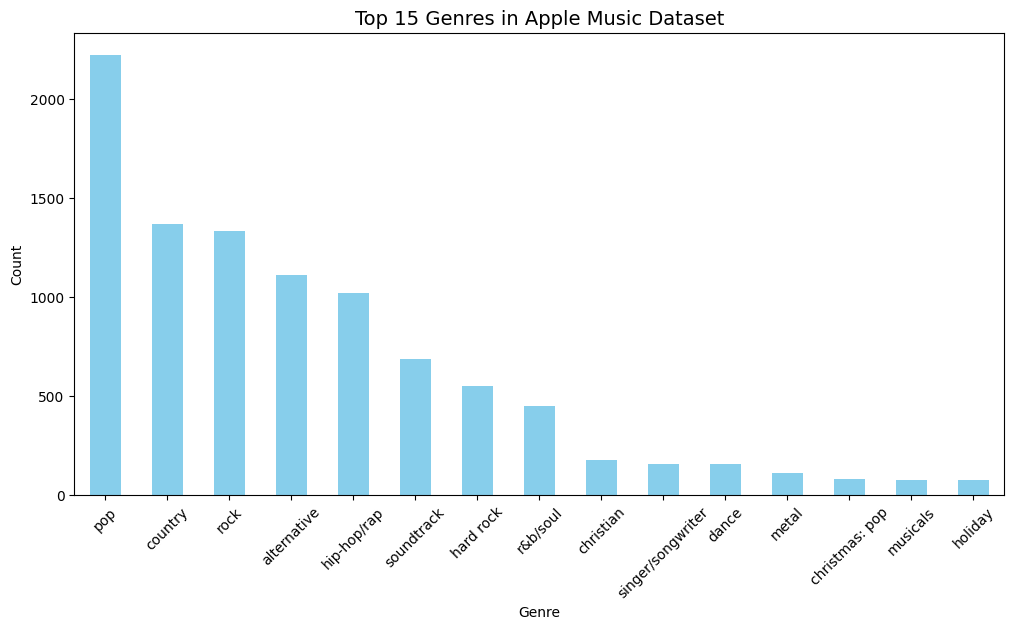

In [18]:
plt.figure(figsize=(12,6))
df['primaryGenreName'].value_counts().head(15).plot(kind='bar', color='skyblue')
plt.title("Top 15 Genres in Apple Music Dataset", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()

- Pop completely dominates the dataset Followed by Country, Rock, Alternative, Hip-hop/Rap
- A long tail of niche genres (R&B/Soul, Christian, Dance, Metal, Holiday, Musical Soundtracks)

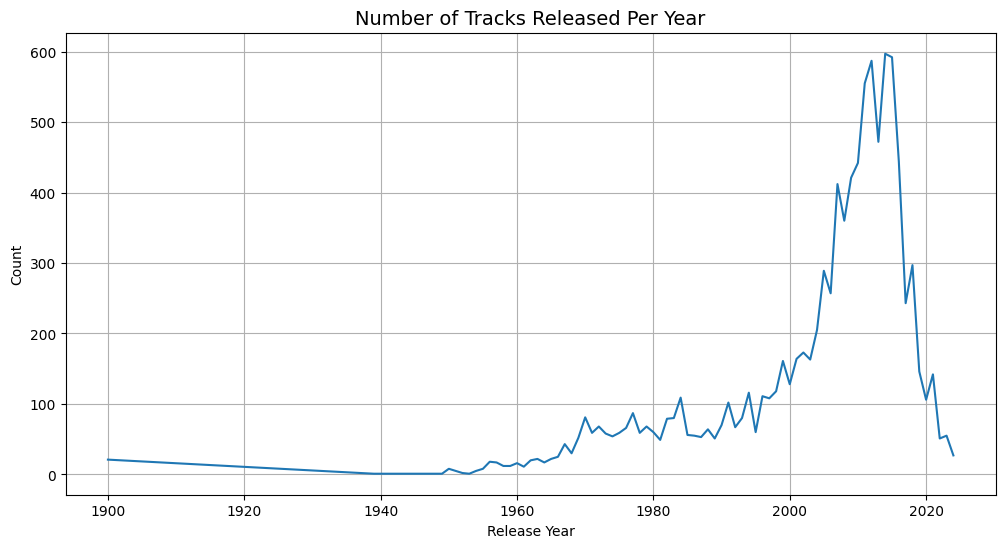

In [19]:
plt.figure(figsize=(12,6))
df['releaseYear'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Tracks Released Per Year", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Release Year")
plt.grid(True)
plt.show()

-  Almost no data before 1940
- Growth begins in the 1950s (modern pop era)
- Explosive growth after 2000 (digital music era)
- Decline after 2020 (due to sampled data)

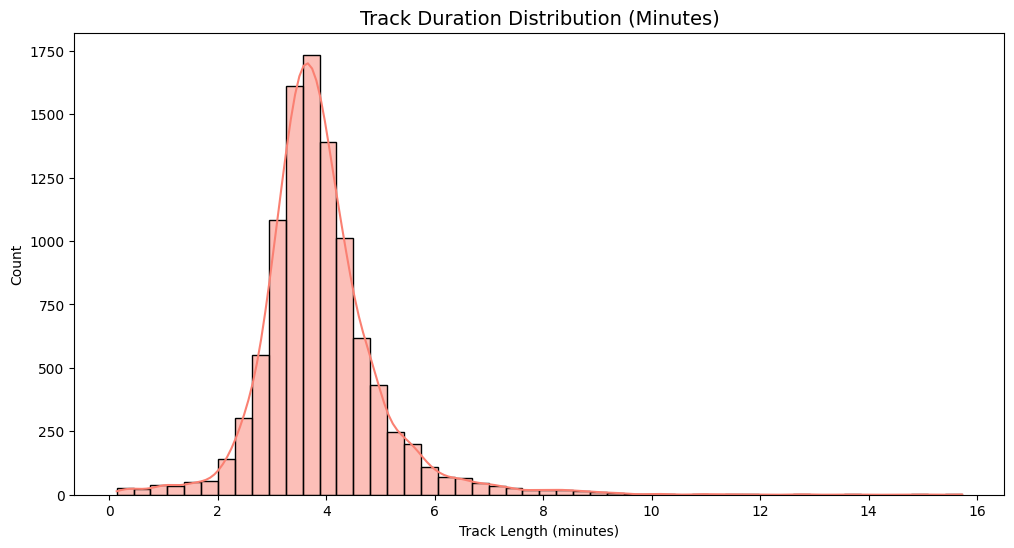

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df['trackTimeMin'], bins=50, kde=True, color='salmon')
plt.title("Track Duration Distribution (Minutes)", fontsize=14)
plt.xlabel("Track Length (minutes)")
plt.ylabel("Count")
plt.show()

- Peak around 3.5–4 minutes
- Long tail up to 10+ minutes
- Very few tracks under 2 minutes
- Shape is ~normal distribution

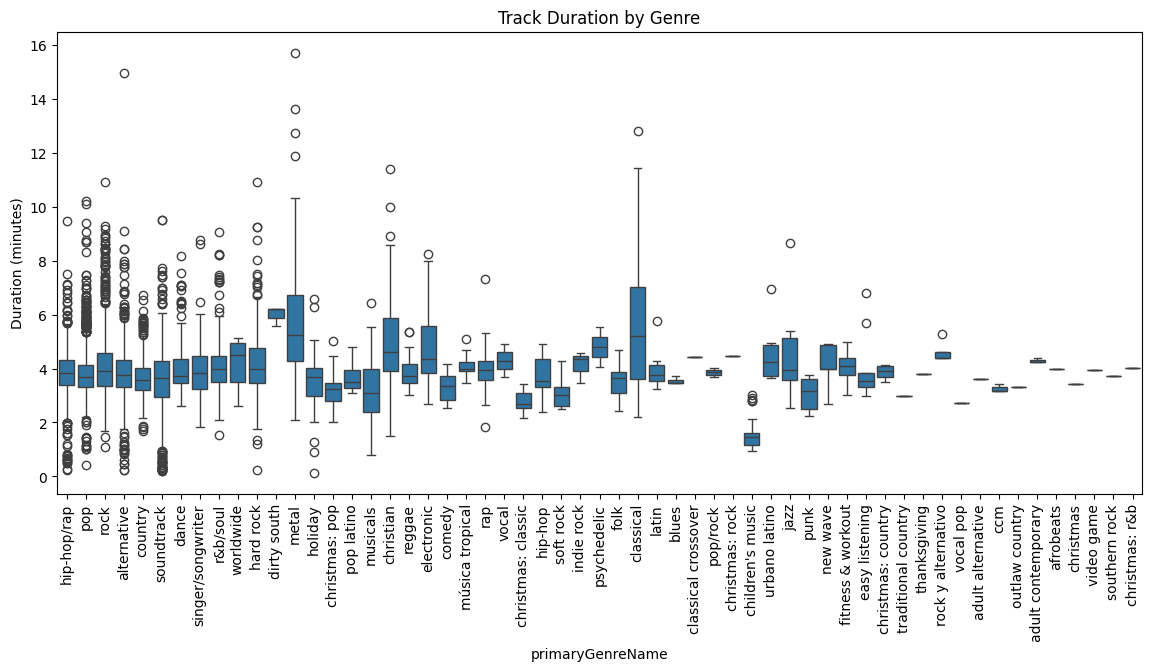

In [21]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='primaryGenreName', y='trackTimeMin')
plt.xticks(rotation=90)
plt.title("Track Duration by Genre")
plt.ylabel("Duration (minutes)")
plt.show()

- Classical, jazz, and soundtracks → consistently long tracks (6–10+ minutes)
- Hip-hop/rap, pop, dance, country, rock → tightly clustered around 3–4 minutes
- Comedy, holiday, musicals → more diverse durations
- Some genres show extreme outliers (e.g., 15–16 minute tracks)

Track length is genre-dependent. Mainstream genres (pop, hip-hop, dance, rock) tightly center around 3–4 minutes, reflecting commercial formats optimized for high engagement and minimal skip risk. Classical, jazz, and soundtrack genres demonstrate significantly longer durations, which is consistent with the structure of extended compositions. Editorial teams should consider these differences when designing playlists, ensuring smooth pacing and predictable listening flow.

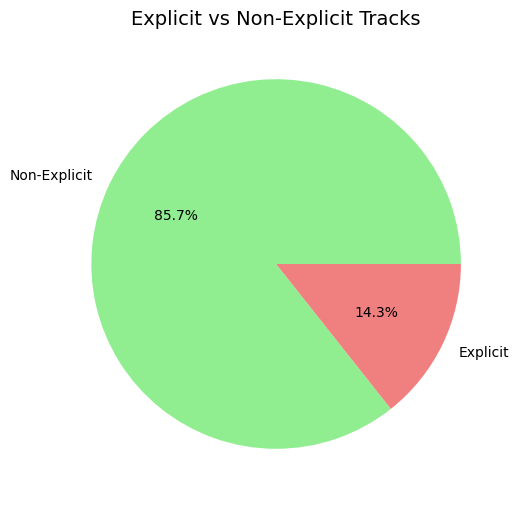

In [22]:
plt.figure(figsize=(6,6))
df['isExplicit'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Non-Explicit','Explicit'], colors=['lightgreen','lightcoral'])
plt.title("Explicit vs Non-Explicit Tracks", fontsize=14)
plt.ylabel("")
plt.show()

- only 14% are explicit
- catalog skews toward general audience /. family-safe content

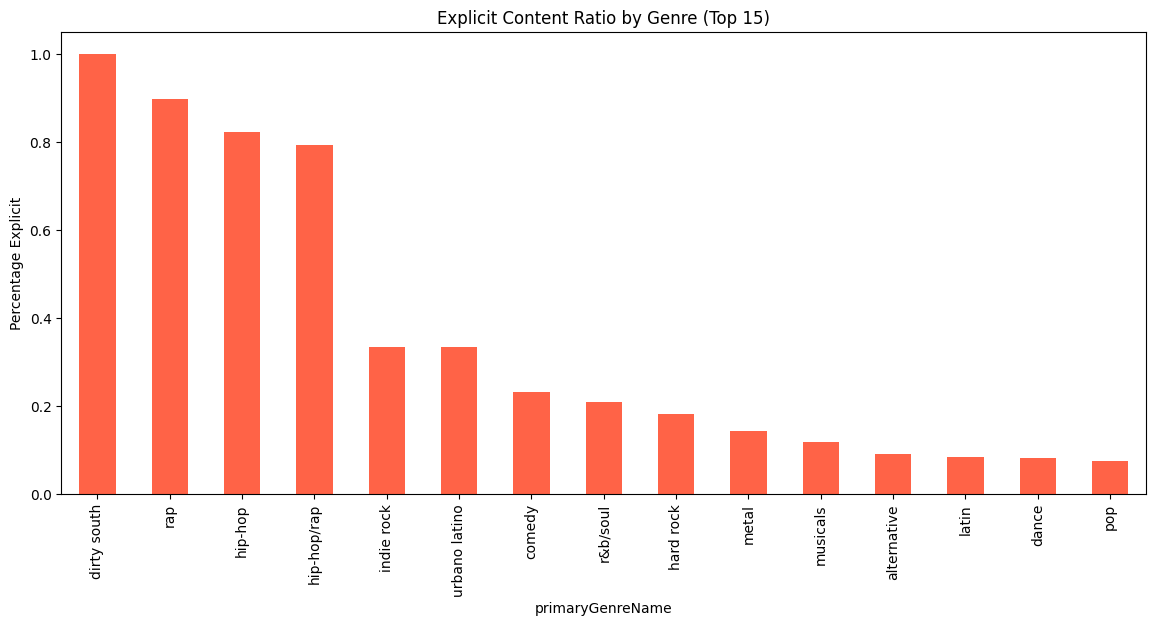

In [23]:
explicit_by_genre = df.groupby('primaryGenreName')['isExplicit'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14,6))
explicit_by_genre.plot(kind='bar', color='tomato')
plt.title("Explicit Content Ratio by Genre (Top 15)")
plt.ylabel("Percentage Explicit")
plt.show()

Explicit content is heavily concentrated in specific sub-genres of hip-hop and rap, where 80–100% of tracks include advisory labels. In contrast, pop, dance, and Latin music show low explicit ratios. This polarization has implications for parental controls, editorial playlist targeting, and content policies across age-sensitive regions.

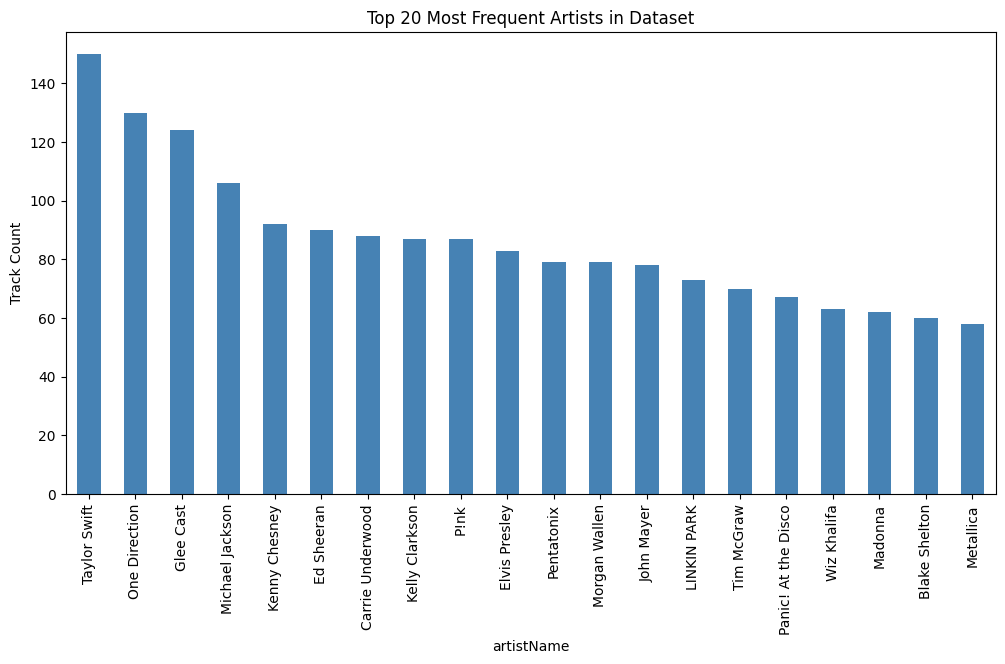

In [24]:
top_artists = df['artistName'].value_counts().head(20)

plt.figure(figsize=(12,6))
top_artists.plot(kind='bar', color='steelblue')
plt.title("Top 20 Most Frequent Artists in Dataset")
plt.ylabel("Track Count")
plt.show()

The dataset highlights a strong representation of globally influential artists across pop, rock, and country genres. Taylor Swift, One Direction, and Ed Sheeran dominate the catalog sample, reflecting consistent consumer demand and high-volume discographies. Legacy artists like Michael Jackson, Elvis Presley, and Madonna provide deep catalog value that drives back-catalog streaming, a major contributor to Apple Music revenue.

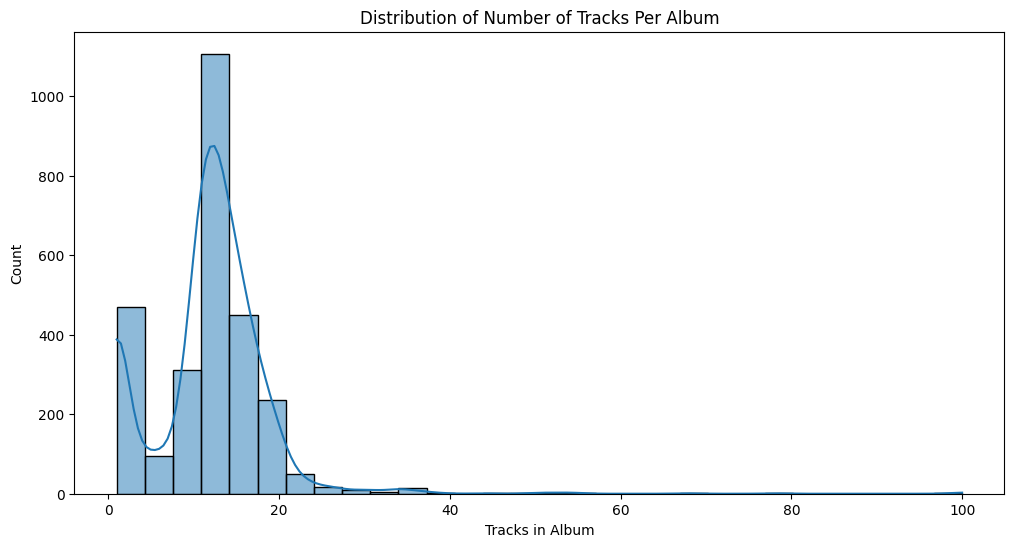

In [25]:
album_track_counts = df.groupby('collectionId')['trackCount'].max()

plt.figure(figsize=(12,6))
sns.histplot(album_track_counts, bins=30, kde=True)
plt.title("Distribution of Number of Tracks Per Album")
plt.xlabel("Tracks in Album")
plt.ylabel("Count")
plt.show()

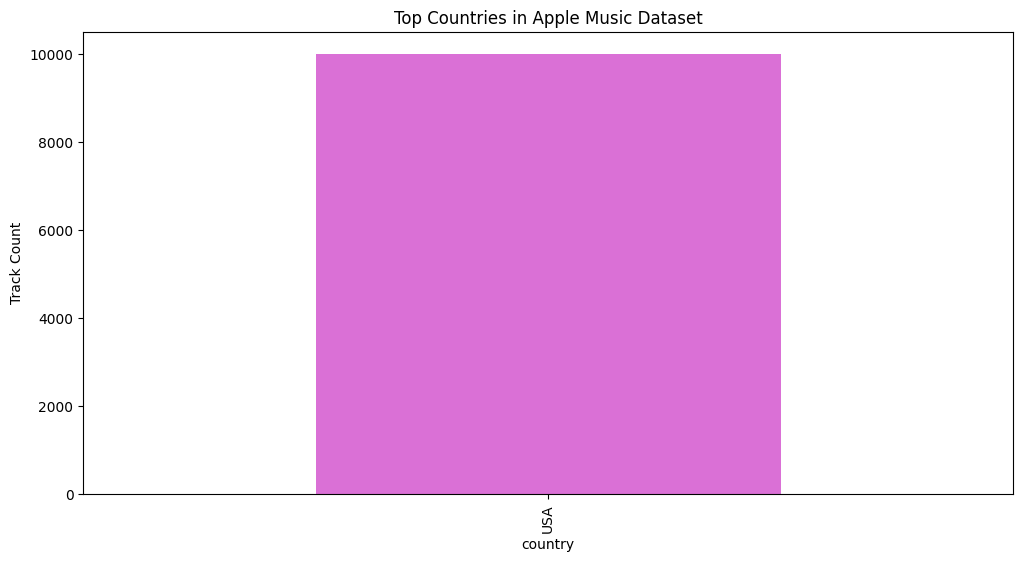

In [26]:
plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar', color='orchid')
plt.title("Top Countries in Apple Music Dataset")
plt.ylabel("Track Count")
plt.show()

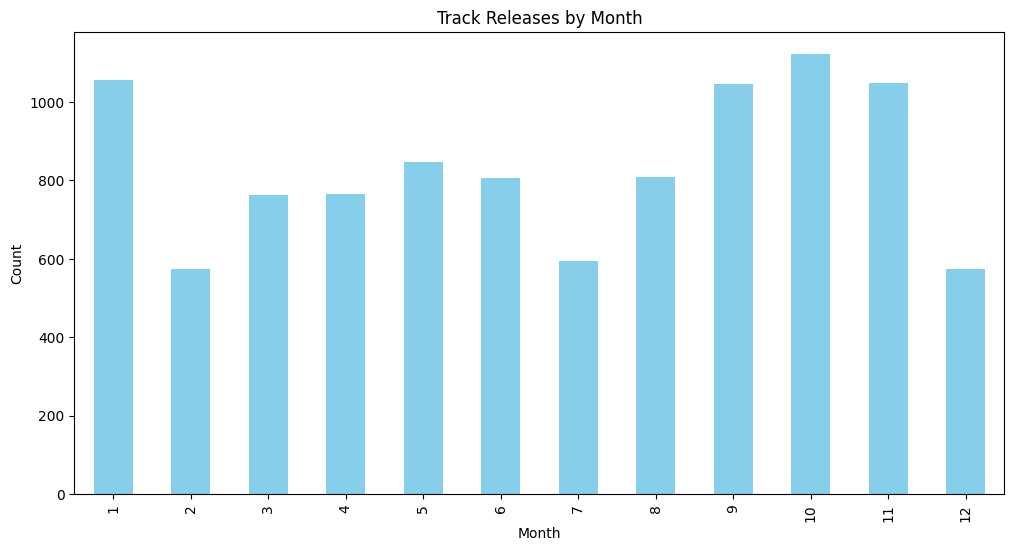

In [27]:
df['releaseMonth'] = df['releaseDate'].dt.month
plt.figure(figsize=(12,6))
df['releaseMonth'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Track Releases by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

- Biggest release spikes in January, October, November
- Lowest in February, July, December
- Strong mid-year consistency

Track releases peak in January and again in October–November, matching industry cycles: new year releases, fall album season, and pre-holiday ramps. Lower volumes in February and December reflect typical industry lulls. These seasonal trends are crucial for planning editorial promotions, new-music campaigns, and themed playlists.

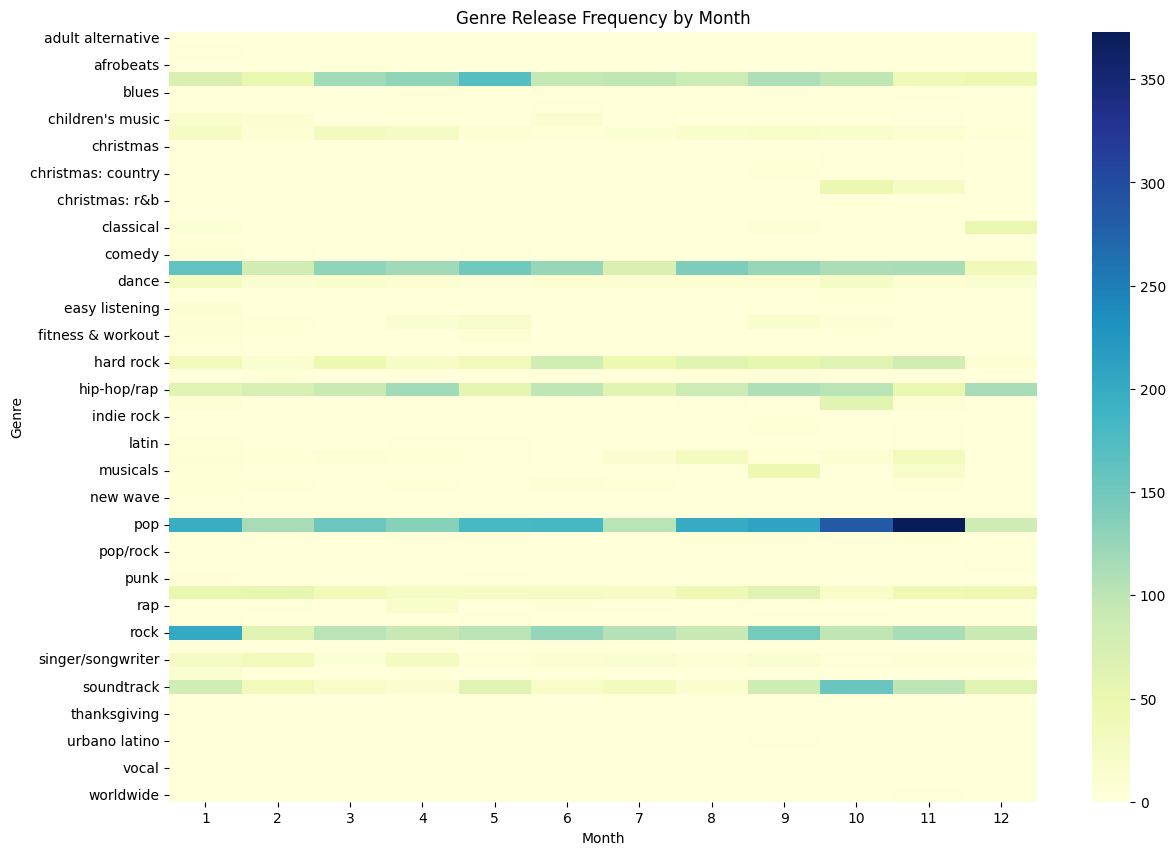

In [28]:
genre_month = pd.crosstab(df['primaryGenreName'], df['releaseMonth'])

plt.figure(figsize=(14,10))
sns.heatmap(genre_month, cmap='YlGnBu')
plt.title("Genre Release Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Genre")
plt.show()

- Pop dominates every month (consistent release volume)
- Rock shows strong activity March–April & September–October
- Hip-hop/rap peaks around March–June
- Soundtrack spikes in late summer (likely tied to movie releases)
- Christmas genres spike sharply in November–December

Seasonal genre patterns clearly emerge. Pop remains stable across the year, serving as an evergreen content category. Hip-hop/rap releases concentrate in spring and early summer, reflecting festival and touring seasons. Rock albums peak in early spring and fall, consistent with historical release cycles. Holiday genres predictably spike in November and December, reinforcing the need for timely editorial updates to seasonal playlists.